In [5]:
! brew install ta-lib
! pip install ta-lib mplfinance

To reinstall 0.6.4, run:
  brew reinstall ta-lib
Defaulting to user installation because normal site-packages is not writeable
  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-lib: filename=ta_lib-0.6.3-cp39-cp39-macosx_10_9_universal2.whl size=1155142 sha256=269a95e996221bfb17a1c426934e84b957cf14fb12e3b75e72219132c4542c46
  Stored in directory: /Users/lin1214/Library/Caches/pip/wheels/c0/e5/d8/55fba71357a5d8696b74bbf05fbcb65840582656f965d65d9c
Successfully built ta-lib

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import talib
from datetime import datetime
import matplotlib.ticker as mticker
import os

cwd = os.getcwd()
print(cwd)
os.chdir(cwd)   

/Users/lin1214/Desktop/lin1214/github/fintech2025/hw2


# Question 1

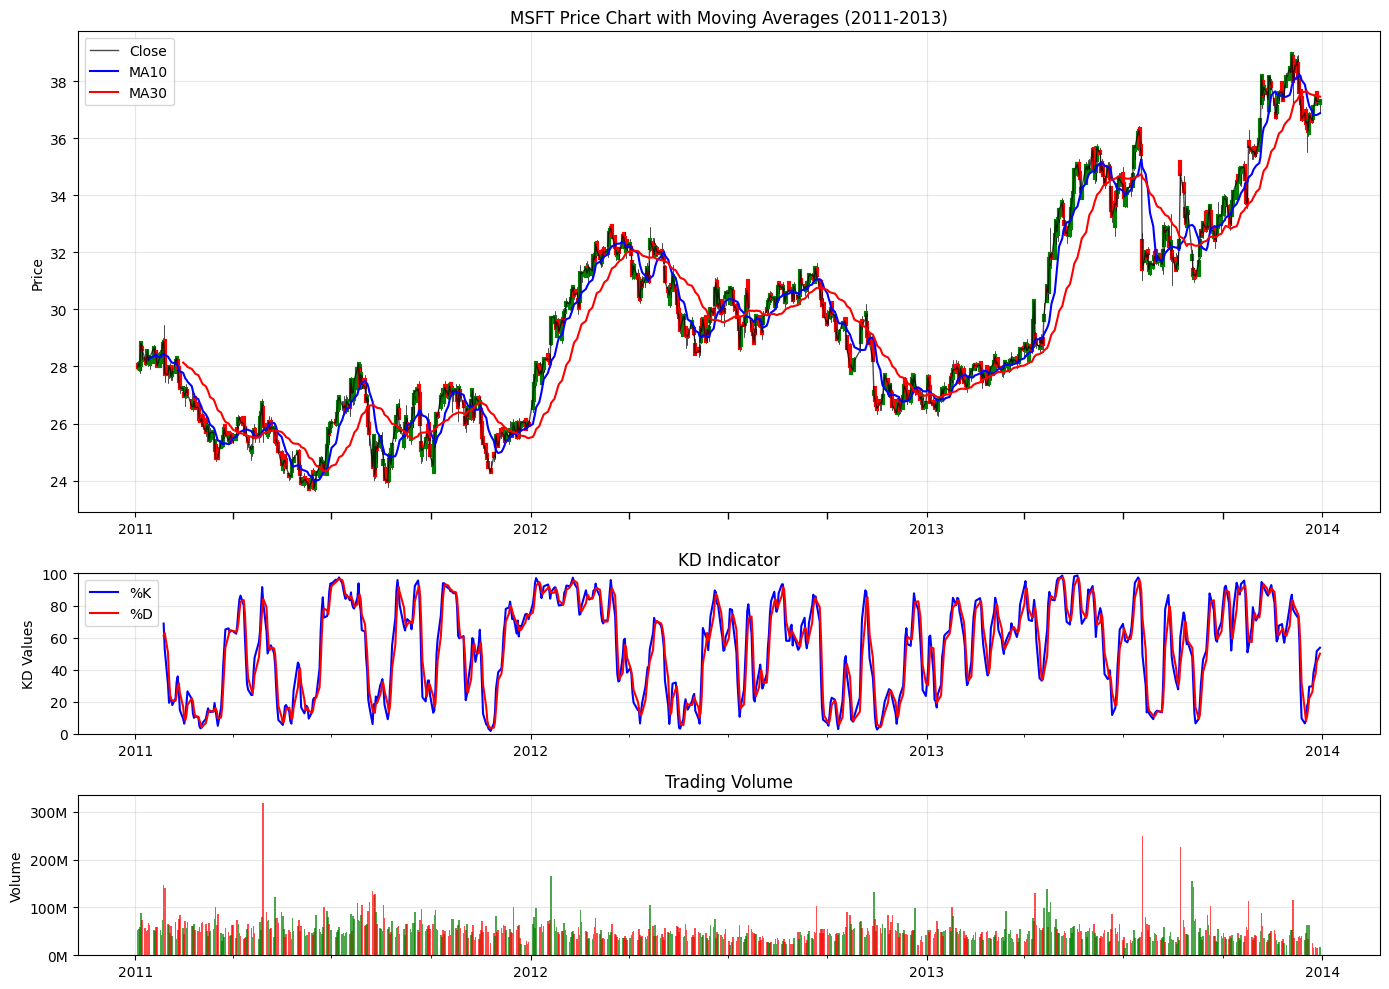

In [15]:
# Load the MSFT data
df = pd.read_csv('MSFT.csv')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as index
df.set_index('Date', inplace=True)

# Filter data for the required period (2011/01/01 to 2013/12/30)
df = df.loc['2011-01-01':'2013-12-30']

# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Calculate KD indicators
df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'], 
                              fastk_period=14, slowk_period=3, slowk_matype=0, 
                              slowd_period=3, slowd_matype=0)

# Create subplots
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3, 1, height_ratios=[3, 1, 1])

# a) Price chart with moving averages
ax1 = fig.add_subplot(gs[0])

# Plot high and low as a vertical line
for i in range(len(df)):
    date = df.index[i]
    high = df['High'].iloc[i]
    low = df['Low'].iloc[i]
    open_price = df['Open'].iloc[i]
    close_price = df['Close'].iloc[i]
    
    # Plot the high-low line
    ax1.plot([date, date], [low, high], color='black', linewidth=0.5)
    
    # Determine color based on whether close is higher than open
    color = 'green' if close_price >= open_price else 'red'
    
    # Plot the open-close body
    ax1.plot([date, date], [open_price, close_price], color=color, linewidth=3)

# Add close price and moving averages
ax1.plot(df.index, df['Close'], label='Close', color='black', linewidth=1.0, alpha=0.7)
ax1.plot(df.index, df['MA10'], label='MA10', color='blue', linewidth=1.5)
ax1.plot(df.index, df['MA30'], label='MA30', color='red', linewidth=1.5)

# Format x-axis with minimal labels
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', which='major', labelsize=10)
ax1.tick_params(axis='x', which='minor', length=5, width=1.0)

# Add labels and legend
ax1.set_ylabel('Price')
ax1.set_title('MSFT Price Chart with Moving Averages (2011-2013)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# b) KD line chart
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Plot KD lines
ax2.plot(df.index, df['K'], label='%K', color='blue')
ax2.plot(df.index, df['D'], label='%D', color='red')

# Add labels and legend
ax2.set_ylabel('KD Values')
ax2.set_title('KD Indicator')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

# c) Volume bar chart
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Plot volume bars with colors based on price movement
colors = ['green' if df['Close'].iloc[i] >= df['Open'].iloc[i] else 'red' for i in range(len(df))]
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.7, width=1.5)

# Add labels
ax3.set_ylabel('Volume')
ax3.set_title('Trading Volume')
ax3.grid(True, alpha=0.3)

# Format y-axis to show volume in millions
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1000000:.0f}M'))

# Remove x-axis labels from the first two plots
ax1.set_xticklabels([])
ax2.set_xticklabels([])

# Only show year labels on the bottom plot
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.xaxis.set_major_locator(mdates.YearLocator())

# Adjust layout
plt.tight_layout()
plt.show()

# Question 2

Training data shape: (90, 45)
Validation data shape: (124, 45)
Test data shape: (127, 45)

Normalized training data statistics:
            Open       High        Low      Close     Volume       MA10  \
count  90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    0.492475   0.490116   0.485645   0.482480   0.264292   0.521379   
std     0.319418   0.324528   0.336282   0.321582   0.165433   0.357819   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.163861   0.151104   0.145445   0.144193   0.183859   0.106761   
50%     0.545545   0.545181   0.535197   0.523622   0.236438   0.522341   
75%     0.788614   0.798695   0.810041   0.787894   0.304278   0.884454   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            MA30          K          D  Price_Change  ...  Upper_Band  \
count  90.000000  90.000000  90.000000     90.000000  ...   90.000000   
mean    0.618086   0.431417   0.439930      0.5183

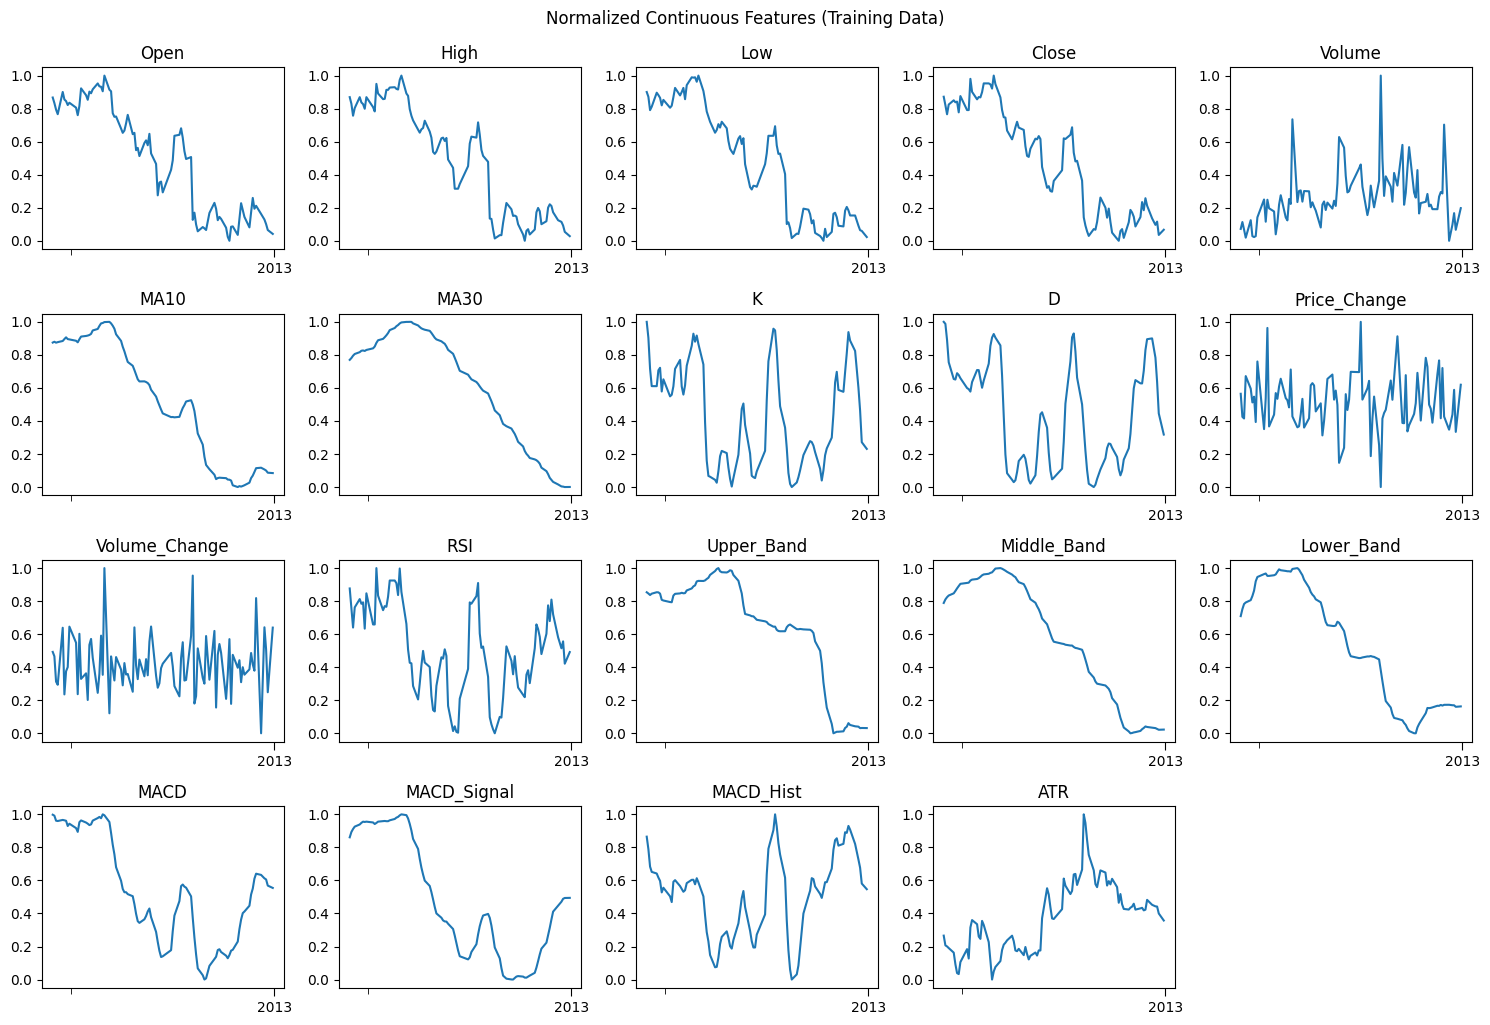

In [189]:
# Question 2 - Part (ii): Data Preprocessing

# Continue with the dataframe from Question 1
# First, let's create additional features that might be useful

# 1. Add weekday information
df['Weekday'] = df.index.dayofweek  # 0 is Monday, 6 is Sunday

# 2. Add price change percentage
df['Price_Change'] = df['Close'].pct_change() * 100

# 3. Add volume change percentage
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 4. Add Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# 5. Add Bollinger Bands
df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# 6. Add MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 7. Add Average True Range (ATR) - volatility indicator
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

# 8. Add day of month
df['Day_of_Month'] = df.index.day

# 9. Add month
df['Month'] = df.index.month

# Drop NaN values that result from calculations
df.dropna(inplace=True)

# Split the data into training, validation, and test sets
train_data = df.loc['2011-01-01':'2012-12-31']
val_data = df.loc['2013-01-01':'2013-06-30']
test_data = df.loc['2013-07-01':'2013-12-30']

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Separate continuous features from categorical (date-related) features
continuous_features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MA10', 'MA30', 'K', 'D',  # Required features
    'Price_Change', 'Volume_Change', 'RSI',
    'Upper_Band', 'Middle_Band', 'Lower_Band',
    'MACD', 'MACD_Signal', 'MACD_Hist', 'ATR'
]

categorical_features = ['Weekday', 'Day_of_Month', 'Month']

# Normalize only continuous features to [0, 1] scale using min-max normalization
# We'll normalize based on the training data only to prevent data leakage
min_values = train_data[continuous_features].min()
max_values = train_data[continuous_features].max()
range_values = max_values - min_values

# Apply normalization to continuous features in all datasets
train_normalized = pd.DataFrame()
val_normalized = pd.DataFrame()
test_normalized = pd.DataFrame()

# Normalize continuous features
for feature in continuous_features:
    train_normalized[feature] = (train_data[feature] - min_values[feature]) / range_values[feature]
    val_normalized[feature] = (val_data[feature] - min_values[feature]) / range_values[feature]
    test_normalized[feature] = (test_data[feature] - min_values[feature]) / range_values[feature]

# Add categorical features without normalization
for feature in categorical_features:
    train_normalized[feature] = train_data[feature]
    val_normalized[feature] = val_data[feature]
    test_normalized[feature] = test_data[feature]

# Check the normalized data
print("\nNormalized training data statistics:")
print(train_normalized.describe())

# Visualize the normalized features with minimal x-axis labels
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features[:len(continuous_features)]):  # Plot first 12 features
    plt.subplot(4, 5, i+1)
    plt.plot(train_normalized[feature])
    plt.title(feature)
    
    # Minimize x-axis labels - only show years
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6))
    ax.tick_params(axis='x', which='minor', length=4)
    ax.tick_params(axis='x', which='major', length=6)
    plt.xticks(rotation=0)  # No rotation for year labels
    
    plt.tight_layout()
plt.suptitle('Normalized Continuous Features (Training Data)', y=1.02)
plt.show()

# Answer to part (ii)


## Feature Engineering
### Price & Volume Features
* Basic: Open, High, Low, Close, Volume
* Required: MA10, MA30 (trend), K, D (momentum)
### Technical Indicators
* RSI: Momentum oscillator (0-100); >70 overbought, <30 oversold
* Bollinger Bands: Volatility channels (Upper, Middle, Lower)
* MACD: Trend-following momentum (MACD, Signal, Histogram)
* ATR: Volatility measurement
### Additional Features
* Change Metrics: Price_Change%, Volume_Change%
* Time Features: Weekday, Day_of_Month, Month (kept as categorical)
### Normalization
* Continuous features: Min-max scaled to [0,1]
* Categorical features: Kept unnormalized

# Question 3 + 4 + 5
### Vanilla RNN

Training sequences shape: (1629, 30, 19)
Validation sequences shape: (407, 30, 19)
Test sequences shape: (313, 30, 19)
ImprovedVanillaRNN(
  (rnn1): RNN(19, 64, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (rnn2): RNN(128, 32, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)
Total parameters: 22305
Epoch 1/1000, Train Loss: 0.019611, Val Loss: 0.012236
Epoch 2/1000, Train Loss: 0.003850, Val Loss: 0.005901
Epoch 3/1000, Train Loss: 0.003007, Val Loss: 0.006219
Epoch 4/1000, Train Loss: 0.002753, Val Loss: 0.004787
Epoch 5/1000, Train Loss: 0.002797, Val Loss: 0.004031
Epoch 6/1000, Train Loss: 0.002476, Val Loss: 0.007878
Epoch 7/1000, Train Loss: 0.002212, Val Loss: 0.005093
Epoch 8/1000, Train Loss: 0.002149, Val Loss: 0.012612
Epoch 9/1000, Train Loss: 0.001805, Val Loss: 0.00

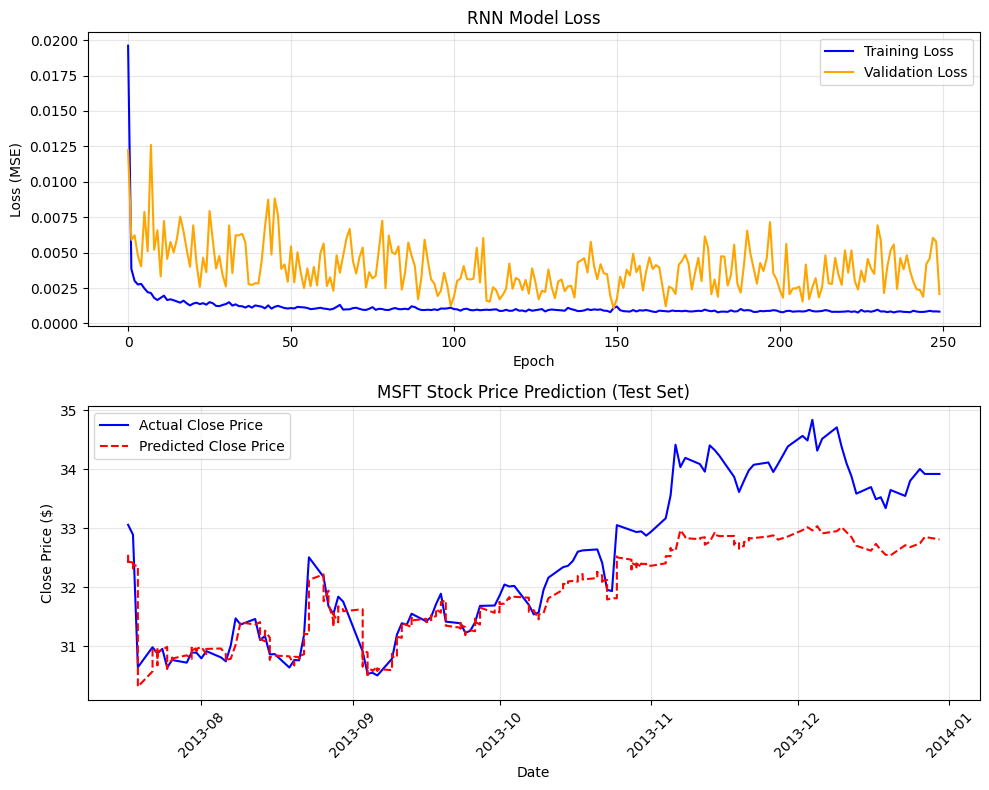

"\nPyTorch RNN Model Design Explanation:\n\n1. Data Preparation:\n   - Used 30 days of historical data (time_steps=30) to predict the next day's Close price\n   - Selected 13 key features including price data, technical indicators, and momentum indicators\n   - All features were normalized to [0,1] scale using min-max normalization\n   - Created custom PyTorch Dataset and DataLoader classes for efficient batch processing\n\n2. Model Architecture:\n   - Input Shape: (batch_size, 30, 13) - 30 time steps with 13 features each\n   - First RNN Layer: 64 hidden units with tanh activation (PyTorch default)\n   - Dropout (20%): To prevent overfitting\n   - Second RNN Layer: 32 hidden units with tanh activation\n   - Dropout (20%): Additional regularization\n   - Dense Layer: 16 units with ReLU activation for non-linearity\n   - Output Layer: Single unit for regression prediction of Close price\n\n3. Training Strategy:\n   - Loss Function: Mean Squared Error (MSE)\n   - Optimizer: Adam with def

In [292]:
# Question 3 + 4 + 5

# Part (iv): Constructing an RNN model with Vanilla RNN cell using PyTorch

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a custom dataset class for sequences
class StockDataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

# Prepare data for RNN (sequence data)
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(data.iloc[i + time_steps]['Close'])  # Predict the Close price
    return np.array(X), np.array(y)

# Select features for the model
selected_features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MA10', 'MA30', 'K', 'D',  # Required features
    'Price_Change', 'Volume_Change', 'RSI',
    'Upper_Band', 'Middle_Band', 'Lower_Band',
    'MACD', 'MACD_Signal', 'MACD_Hist', 'ATR'
]

# Create sequences for training, validation, and test sets
X_train, y_train = create_sequences(train_normalized[selected_features], time_steps=30)
X_val, y_val = create_sequences(val_normalized[selected_features], time_steps=30)
X_test, y_test = create_sequences(test_normalized[selected_features], time_steps=30)

print(f"Training sequences shape: {X_train.shape}")
print(f"Validation sequences shape: {X_val.shape}")
print(f"Test sequences shape: {X_test.shape}")

# Create PyTorch datasets
train_dataset = StockDataset(X_train, y_train)
val_dataset = StockDataset(X_val, y_val)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class ImprovedVanillaRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.2):
        super(ImprovedVanillaRNN, self).__init__()
        self.rnn1 = nn.RNN(input_dim, hidden_dim1, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.rnn2 = nn.RNN(hidden_dim1 * 2, hidden_dim2, batch_first=True, bidirectional=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_dim2 * 2, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, output_dim)
        
    def forward(self, x):
        # First RNN layer
        out, _ = self.rnn1(x)
        out = self.dropout1(out)
        
        # Second RNN layer
        out, _ = self.rnn2(out)
        out = self.dropout2(out[:, -1, :])  # Take only the last time step output
        
        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        
        return out

# Initialize the improved RNN model
input_dim = len(selected_features)
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = 1

# Create improved RNN model and move to device
improved_rnn_model = ImprovedVanillaRNN(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(improved_rnn_model.parameters())

# Print model summary
print(improved_rnn_model)
total_params = sum(p.numel() for p in improved_rnn_model.parameters())
print(f"Total parameters: {total_params}")

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=1000, patience=100):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
    
    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, train_losses, val_losses

# Train the model
model, train_losses, val_losses = train_model(
    improved_rnn_model, train_loader, val_loader, criterion, optimizer, num_epochs=1000, patience=100
)

# Part (v): Plot loss curve and predictions

# Make predictions on test data
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_pred.extend(outputs.cpu().numpy())

y_pred = np.array(y_pred).flatten()

# Denormalize the predictions and actual values to get the original scale
y_test_denorm = y_test * range_values['Close'] + min_values['Close']
y_pred_denorm = y_pred * range_values['Close'] + min_values['Close']

# Calculate MSE on the denormalized values
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {np.sqrt(mse):.4f}")

# Create a DataFrame with dates for plotting
test_dates = test_data.index[30:]  # Skip first 30 days used for sequence
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': y_pred_denorm
})

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(train_losses, label='Training Loss', color='blue')
ax[0].plot(val_losses, label='Validation Loss', color='orange')
ax[0].set_title('RNN Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(results_df['Date'], results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Add explanation of the model design
"""
PyTorch RNN Model Design Explanation:

1. Data Preparation:
   - Used 30 days of historical data (time_steps=30) to predict the next day's Close price
   - Selected 13 key features including price data, technical indicators, and momentum indicators
   - All features were normalized to [0,1] scale using min-max normalization
   - Created custom PyTorch Dataset and DataLoader classes for efficient batch processing

2. Model Architecture:
   - Input Shape: (batch_size, 30, 13) - 30 time steps with 13 features each
   - First RNN Layer: 64 hidden units with tanh activation (PyTorch default)
   - Dropout (20%): To prevent overfitting
   - Second RNN Layer: 32 hidden units with tanh activation
   - Dropout (20%): Additional regularization
   - Dense Layer: 16 units with ReLU activation for non-linearity
   - Output Layer: Single unit for regression prediction of Close price

3. Training Strategy:
   - Loss Function: Mean Squared Error (MSE)
   - Optimizer: Adam with default learning rate
   - Batch Size: 32 samples per gradient update
   - Early Stopping: To prevent overfitting by monitoring validation loss with patience=10
   - Training/Validation/Test Split: 2011-2012 for training, first half of 2013 for validation, 
     second half of 2013 for testing

4. Performance Evaluation:
   - MSE on denormalized predictions
   - Visual comparison of actual vs. predicted values
"""

# Question 6

ImprovedLSTMModel(
  (lstm1): LSTM(19, 128, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(256, 64, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)
Total parameters: 322113
Epoch 1/1000, Train Loss: 0.082979, Val Loss: 0.961952
Epoch 2/1000, Train Loss: 0.070592, Val Loss: 0.876104
Epoch 3/1000, Train Loss: 0.059666, Val Loss: 0.757589
Epoch 4/1000, Train Loss: 0.047038, Val Loss: 0.602918
Epoch 5/1000, Train Loss: 0.043230, Val Loss: 0.502623
Epoch 6/1000, Train Loss: 0.043221, Val Loss: 0.503634
Epoch 7/1000, Train Loss: 0.033596, Val Loss: 0.516031
Epoch 8/1000, Train Loss: 0.031871, Val Loss: 0.505811
Epoch 9/1000, Train Loss: 0.026572, Val Loss: 0.437425
Epoch 10/1000, Train Loss: 0.022770, Val Loss: 0

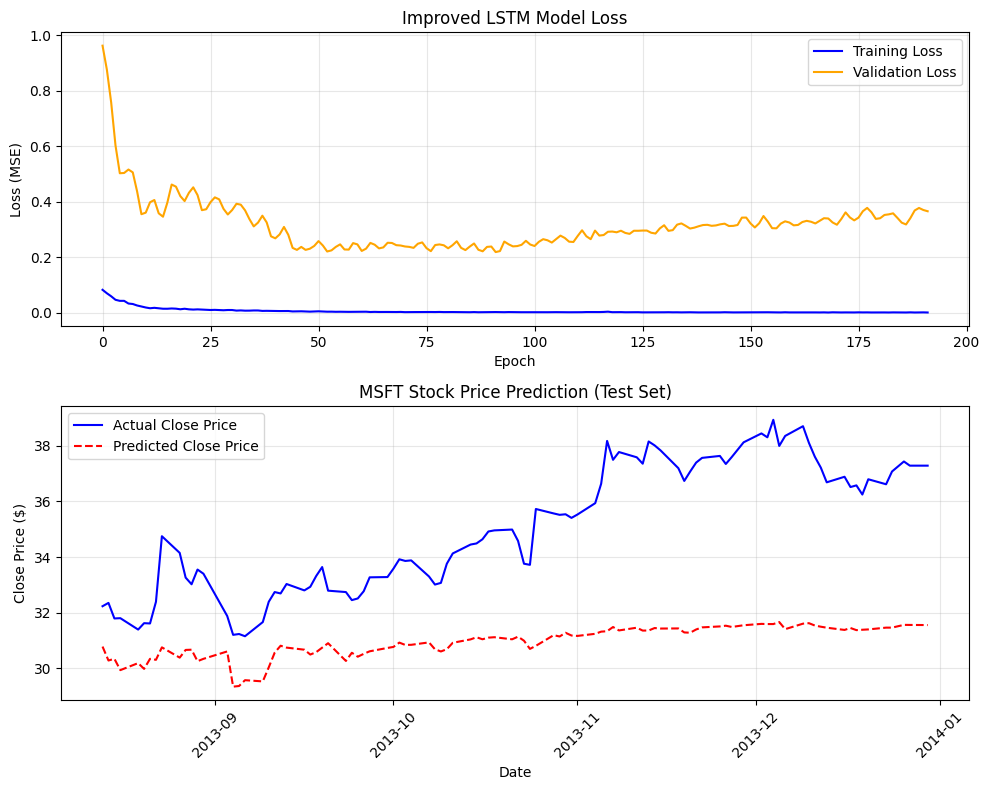

In [219]:
class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.2):
        super(ImprovedLSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_dim, hidden_dim1, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.lstm2 = nn.LSTM(hidden_dim1 * 2, hidden_dim2, batch_first=True, bidirectional=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_dim2 * 2, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_dim)
        
    def forward(self, x):
        # First LSTM layer
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        
        # Second LSTM layer
        out, _ = self.lstm2(out)
        out = self.dropout2(out[:, -1, :])  # Take only the last time step output
        
        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out

# Initialize the improved LSTM model
input_dim = len(selected_features)
hidden_dim1 = 128  # Increased hidden units
hidden_dim2 = 64   # Increased hidden units
output_dim = 1

# Create improved LSTM model and move to device
improved_lstm_model = ImprovedLSTMModel(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(improved_lstm_model.parameters())

# Print model summary
print(improved_lstm_model)
total_params = sum(p.numel() for p in improved_lstm_model.parameters())
print(f"Total parameters: {total_params}")

# Train the improved LSTM model
improved_lstm_model, improved_lstm_train_losses, improved_lstm_val_losses = train_model(
    improved_lstm_model, train_loader, val_loader, criterion, optimizer, num_epochs=1000, patience=100
)

# Make predictions on test data
improved_lstm_model.eval()
improved_lstm_y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = improved_lstm_model(inputs)
        improved_lstm_y_pred.extend(outputs.cpu().numpy())

improved_lstm_y_pred = np.array(improved_lstm_y_pred).flatten()

# Denormalize the predictions and actual values to get the original scale
improved_lstm_y_pred_denorm = improved_lstm_y_pred * range_values['Close'] + min_values['Close']

# Calculate MSE on the denormalized values
improved_lstm_mse = mean_squared_error(y_test_denorm, improved_lstm_y_pred_denorm)
print(f"Improved LSTM Test MSE: {improved_lstm_mse:.4f}")
print(f"Improved LSTM Test RMSE: {np.sqrt(improved_lstm_mse):.4f}")

# Create a DataFrame with dates for plotting
improved_lstm_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': improved_lstm_y_pred_denorm
})

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(improved_lstm_train_losses, label='Training Loss', color='blue')
ax[0].plot(improved_lstm_val_losses, label='Validation Loss', color='orange')
ax[0].set_title('Improved LSTM Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(results_df['Date'], results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Question 7

In [208]:
# Updated training function with gradient clipping and learning rate scheduling
def train_enhanced_gru_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=500, patience=50, clip_value=1.0):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    # Add learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=20, verbose=True, min_lr=1e-6
    )
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass with gradient clipping
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Update learning rate
        scheduler.step(val_loss)
        
        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
    
    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, train_losses, val_losses

ImprovedGRUModel(
  (gru1): GRU(19, 64, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (gru2): GRU(128, 32, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)
Total parameters: 66369
Epoch 1/500, Train Loss: 0.496483, Val Loss: 1.157163
Epoch 2/500, Train Loss: 0.100986, Val Loss: 1.052332
Epoch 3/500, Train Loss: 0.066605, Val Loss: 0.731190
Epoch 4/500, Train Loss: 0.037569, Val Loss: 0.533627
Epoch 5/500, Train Loss: 0.029579, Val Loss: 0.433908


/Users/lin1214/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 6/500, Train Loss: 0.033271, Val Loss: 0.398027
Epoch 7/500, Train Loss: 0.032046, Val Loss: 0.414721
Epoch 8/500, Train Loss: 0.025193, Val Loss: 0.455328
Epoch 9/500, Train Loss: 0.019478, Val Loss: 0.497452
Epoch 10/500, Train Loss: 0.019571, Val Loss: 0.515059
Epoch 11/500, Train Loss: 0.021234, Val Loss: 0.478114
Epoch 12/500, Train Loss: 0.016671, Val Loss: 0.403090
Epoch 13/500, Train Loss: 0.011986, Val Loss: 0.330611
Epoch 14/500, Train Loss: 0.014309, Val Loss: 0.277492
Epoch 15/500, Train Loss: 0.012632, Val Loss: 0.258836
Epoch 16/500, Train Loss: 0.014445, Val Loss: 0.269778
Epoch 17/500, Train Loss: 0.010955, Val Loss: 0.292298
Epoch 18/500, Train Loss: 0.011511, Val Loss: 0.305426
Epoch 19/500, Train Loss: 0.012594, Val Loss: 0.294399
Epoch 20/500, Train Loss: 0.009792, Val Loss: 0.261183
Epoch 21/500, Train Loss: 0.009670, Val Loss: 0.237183
Epoch 22/500, Train Loss: 0.009635, Val Loss: 0.231652
Epoch 23/500, Train Loss: 0.008809, Val Loss: 0.236379
Epoch 24/500, 

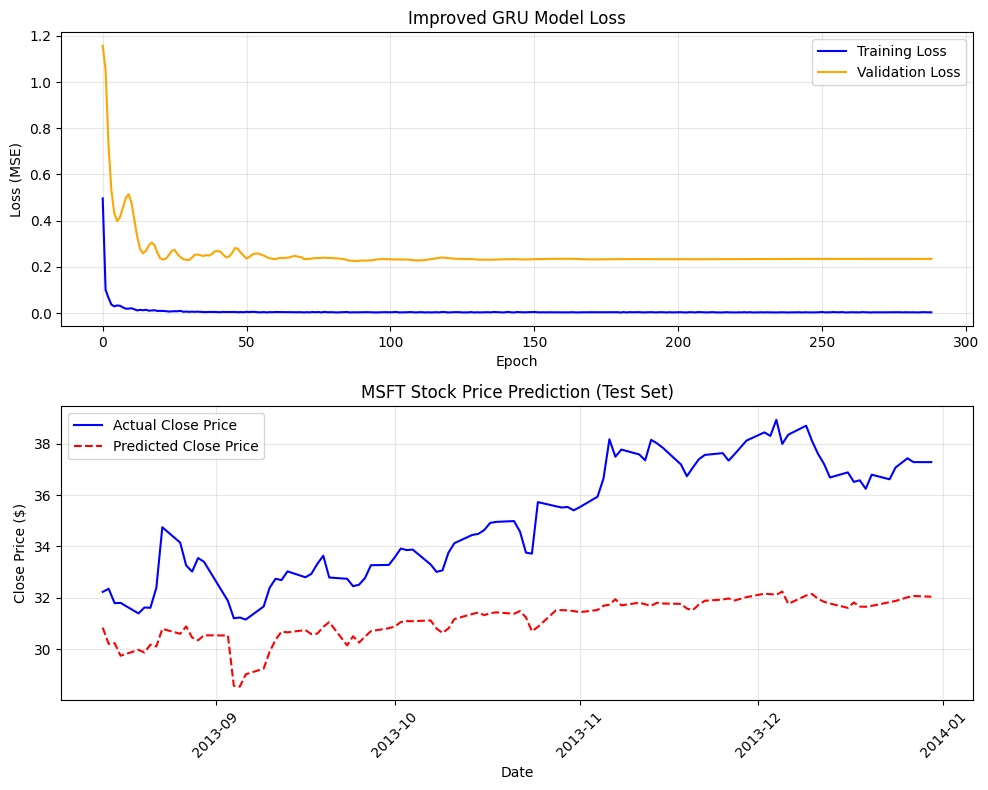

In [220]:
class ImprovedGRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, output_dim=1, dropout_rate=0.25):
        super(ImprovedGRUModel, self).__init__()
        
        # 1. Bidirectional GRU layers
        self.gru1 = nn.GRU(
            input_size=input_dim,
            hidden_size=hidden_dim1,
            batch_first=True,
            bidirectional=True  # Bidirectional for capturing past and future context
        )
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # 2. Second GRU layer (bidirectional)
        self.gru2 = nn.GRU(
            input_size=hidden_dim1 * 2,  # *2 because of bidirectional input
            hidden_size=hidden_dim2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # 3. Output layers with additional dense layer
        self.fc1 = nn.Linear(hidden_dim2 * 2, 32)  # *2 for bidirectional
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_dim)
        
        # Initialize weights using Xavier/Glorot initialization
        self._init_weights()
        
    def _init_weights(self):
        # Xavier/Glorot initialization for better gradient flow
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)
        
    def forward(self, x):
        # First bidirectional GRU layer
        out, _ = self.gru1(x)
        out = self.dropout1(out)
        
        # Second bidirectional GRU layer
        out, _ = self.gru2(out)
        out = self.dropout2(out[:, -1, :])  # Take only the last time step output
        
        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out

# Initialize the improved GRU model
input_dim = len(selected_features)
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = 1

# Create improved GRU model and move to device
improved_gru_model = ImprovedGRUModel(input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.1).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(improved_gru_model.parameters(), lr=0.001, weight_decay=1e-4)

# Print model summary
print(improved_gru_model)
total_params = sum(p.numel() for p in improved_gru_model.parameters())
print(f"Total parameters: {total_params}")

# Train the improved GRU model
improved_gru, improved_gru_train_losses, improved_gru_val_losses = train_enhanced_gru_model(
    improved_gru_model, train_loader, val_loader, criterion, optimizer, 
    num_epochs=500, patience=200, clip_value=1.0
)

# Make predictions on test data
improved_gru_model.eval()
improved_gru_y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = improved_gru_model(inputs)
        improved_gru_y_pred.extend(outputs.cpu().numpy())

improved_gru_y_pred = np.array(improved_gru_y_pred).flatten()

# Denormalize the predictions and actual values to get the original scale
improved_gru_y_pred_denorm = improved_gru_y_pred * range_values['Close'] + min_values['Close']

# Calculate MSE on the denormalized values
improved_gru_mse = mean_squared_error(y_test_denorm, improved_gru_y_pred_denorm)
print(f"Improved GRU Test MSE: {improved_gru_mse:.4f}")
print(f"Improved GRU Test RMSE: {np.sqrt(improved_gru_mse):.4f}")

# Create a DataFrame with dates for plotting
improved_gru_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': improved_gru_y_pred_denorm
})

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(improved_gru_train_losses, label='Training Loss', color='blue')
ax[0].plot(improved_gru_val_losses, label='Validation Loss', color='orange')
ax[0].set_title('Improved GRU Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(improved_gru_results_df['Date'], improved_gru_results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

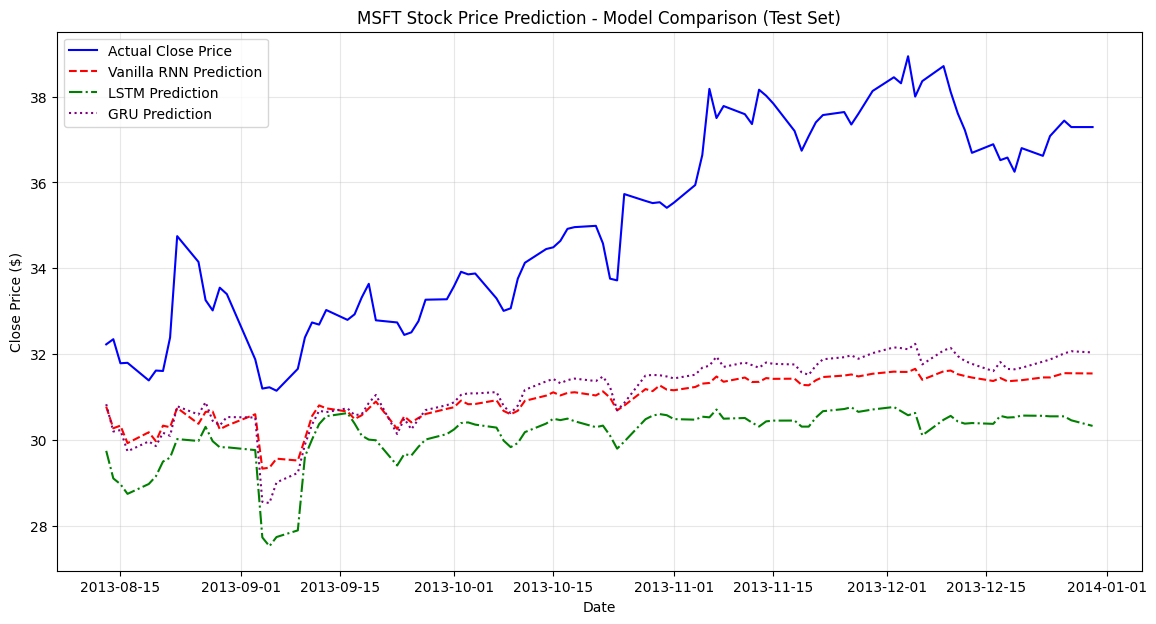

In [221]:
# plot the comparison
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Vanilla RNN Prediction', color='red', linestyle='--')
plt.plot(improved_lstm_results_df['Date'], improved_lstm_results_df['Predicted'], label='LSTM Prediction', color='green', linestyle='-.')
plt.plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='GRU Prediction', color='purple', linestyle=':')
plt.title('MSFT Stock Price Prediction - Model Comparison (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Question 8

In [39]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 174.3 kB/s eta 0:00:0000:020:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 201.6 kB/s eta 0:00:00a 0:00:02

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [274]:
import pickle
import pandas as pd
from transformers import BertTokenizer, BertModel, pipeline
import torch

news_data = None
# Load the news data
with open('MSFT_news.pkl', 'rb') as f:
    news_data = pickle.load(f)

# Check the type and length of news_data
print(f"Type of news_data: {type(news_data)}")
print(f"Length of news_data: {len(news_data)}")

# Print the first item to inspect its structure
if isinstance(news_data, list) and len(news_data) > 0:
    print("Sample item from news_data:")
    print(news_data[0])  # Print the first item
else:
    print("news_data is not a list or is empty.")

news_items = []
for item in news_data:
    if isinstance(item, list) and len(item) == 4:
        tickers, date, title, content = item
        if 'MSFT' in tickers:
            news_items.append({'date': date, 'text': title + " " + content})

# Convert to DataFrame
news_df = pd.DataFrame(news_items)

# Convert 'date' to datetime and set as index
news_df['date'] = pd.to_datetime(news_df['date'])
news_df.set_index('date', inplace=True)

# Display the first few rows to verify
print(news_df.head())

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Function to get BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

# Generate embeddings for each news item
news_df['embedding'] = news_df['text'].apply(get_bert_embedding)

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to get sentiment score
def get_sentiment_score(text):
    result = sentiment_analyzer(text[:512])  # Limit text length for processing
    score = result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']
    return score

# Calculate sentiment scores
news_df['sentiment'] = news_df['text'].apply(get_sentiment_score)

# Load existing features
df = pd.read_csv('MSFT.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Merge news embeddings and sentiment scores with existing features
df = df.join(news_df[['embedding', 'sentiment']], how='left')
df['embedding'] = df['embedding'].fillna(method='ffill')  # Forward fill missing embeddings
df['sentiment'] = df['sentiment'].fillna(0)  # Fill missing sentiment scores with 0



Type of news_data: <class 'list'>
Length of news_data: 2444
Sample item from news_data:
[['MSFT', 'AAPL', 'ARM', 'QCOM'], '2011-03-03', 'microsoft said to plan windows release for tablets in 2012', 'microsoft corp msft  the worlds largest software maker wont release a competitor to apple inc aapl and google incs tablet operating systems until the 2012 backto school season people with knowledge of the plans said public testing of a new version of windows will begin at the end of this year with partners and customers said the people who declined to be identified because the plans havent been disclosed publicly microsoft is working to update its windows 7 operating system with features more tailored to the touch screens size and battery life of tablet computers to win a place in the surging market for the devices the longer it takes microsoft to release its operating system the more time apple and google have to strengthen their hold on the market if 2011 is the year of the tablet wars mi

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
/var/folders/0w/_wqcrkvn2s19nr5dgrwclypm0000gn/T/ipykernel_27858/3395021359.py:72: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embedding'] = df['embedding'].fillna(method='ffill')  # Forward fill missing embeddings


In [276]:
# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Calculate KD indicators
df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'], 
                              fastk_period=14, slowk_period=3, slowk_matype=0, 
                              slowd_period=3, slowd_matype=0)

# 2. Add price change percentage
df['Price_Change'] = df['Close'].pct_change() * 100

# 3. Add volume change percentage
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 4. Add Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# 5. Add Bollinger Bands
df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# 6. Add MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 7. Add Average True Range (ATR) - volatility indicator
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

df['Accumulative_Sentiment'] = df['sentiment'].cumsum()

df = df.fillna(0)

print(df)


             Open   High    Low  Close    Volume  Adj Close  \
2011-01-03  28.05  28.18  27.92  27.98  53443800      21.50   
2011-01-04  27.94  28.17  27.85  28.09  54405600      21.59   
2011-01-05  27.90  28.01  27.77  28.00  58998700      21.52   
2011-01-06  28.04  28.85  27.86  28.82  88026300      22.15   
2011-01-07  28.64  28.74  28.25  28.60  73762000      21.98   
...           ...    ...    ...    ...       ...        ...   
2013-12-23  36.81  36.89  36.55  36.62  25128700      30.61   
2013-12-24  36.72  37.17  36.64  37.08  14243000      30.99   
2013-12-26  37.20  37.49  37.17  37.44  17612800      31.29   
2013-12-27  37.58  37.62  37.17  37.29  14563000      31.17   
2013-12-30  37.22  37.38  36.90  37.29  16290500      31.17   

                                                    embedding  sentiment  \
2011-01-03                                                  0        0.0   
2011-01-04                                                  0        0.0   
2011-01-05     

In [278]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
# Assuming 'df' is your DataFrame with all necessary features

# Define the date ranges for splitting
train_start, train_end = '2011-01-01', '2012-12-31'
val_start, val_end = '2013-01-01', '2013-06-30'
test_start, test_end = '2013-07-01', '2013-12-30'

# Select the features to normalize
features_to_normalize = [
    'Open', 'High', 'Low', 'Close', 'Volume', 
    'MA10', 'MA30', 'K', 'D', 'Price_Change', 
    'Volume_Change', 'RSI', 'Upper_Band', 'Middle_Band', 
    'Lower_Band', 'MACD', 'MACD_Signal', 'MACD_Hist', 
    'ATR', 'Accumulative_Sentiment'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform all datasets
train_data = df.loc[train_start:train_end]
val_data = df.loc[val_start:val_end]
test_data = df.loc[test_start:test_end]

# Normalize the features
train_normalized = train_data.copy()
val_normalized = val_data.copy()
test_normalized = test_data.copy()

train_normalized[features_to_normalize] = scaler.fit_transform(train_data[features_to_normalize])
val_normalized[features_to_normalize] = scaler.transform(val_data[features_to_normalize])
test_normalized[features_to_normalize] = scaler.transform(test_data[features_to_normalize])

# Verify the normalization
print("Training data statistics:")
print(train_normalized[features_to_normalize].describe())

print("\nValidation data statistics:")
print(val_normalized[features_to_normalize].describe())

print("\nTest data statistics:")
print(test_normalized[features_to_normalize].describe())

Training data statistics:
              Open         High          Low        Close       Volume  \
count  1659.000000  1659.000000  1659.000000  1659.000000  1659.000000   
mean      0.473894     0.485098     0.468816     0.480415     0.116135   
std       0.266520     0.271007     0.272731     0.265805     0.083268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.234716     0.241611     0.224524     0.238512     0.069466   
50%       0.448690     0.463087     0.459127     0.456236     0.100783   
75%       0.715066     0.729306     0.716685     0.716630     0.142317   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              MA10         MA30            K            D  Price_Change  \
count  1659.000000  1659.000000  1659.000000  1659.000000   1659.000000   
mean      0.852679     0.854463     0.510401     0.514964      0.488272   
std       0.096905     0.135792     0.296243     0.292095      0.069729   
min    

In [306]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error

# Define a custom dataset class for sequences
class StockDataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

# Prepare data for GRU (sequence data)
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(data.iloc[i + time_steps]['Close'])  # Predict the Close price
    return np.array(X), np.array(y)

# Select features for the model
selected_features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MA10', 'MA30', 'K', 'D', 'Price_Change', 
    'Volume_Change', 'RSI', 'Upper_Band', 'Middle_Band', 
    'Lower_Band', 'MACD', 'MACD_Signal', 'MACD_Hist', 
    'ATR', 'Accumulative_Sentiment'
]

# Create sequences for training, validation, and test sets
X_train, y_train = create_sequences(train_normalized[selected_features], time_steps=30)
X_val, y_val = create_sequences(val_normalized[selected_features], time_steps=30)
X_test, y_test = create_sequences(test_normalized[selected_features], time_steps=30)

# Create PyTorch datasets
train_dataset = StockDataset(X_train, y_train)
val_dataset = StockDataset(X_val, y_val)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Initialize the GRU model
input_dim = len(selected_features)
hidden_dim = 64
output_dim = 1

model = GRUModel(input_dim, hidden_dim, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    
    return train_losses, val_losses

# Train the model and get the loss curves
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)

print(model)

# Evaluate the model on the test set
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_pred.extend(outputs.cpu().numpy())

y_pred = np.array(y_pred).flatten()

Epoch 1/100, Train Loss: 0.039456, Val Loss: 0.006873
Epoch 2/100, Train Loss: 0.002775, Val Loss: 0.005417
Epoch 3/100, Train Loss: 0.001950, Val Loss: 0.004350
Epoch 4/100, Train Loss: 0.001619, Val Loss: 0.006715
Epoch 5/100, Train Loss: 0.001642, Val Loss: 0.004593
Epoch 6/100, Train Loss: 0.001443, Val Loss: 0.003467
Epoch 7/100, Train Loss: 0.001287, Val Loss: 0.002742
Epoch 8/100, Train Loss: 0.001253, Val Loss: 0.002393
Epoch 9/100, Train Loss: 0.001271, Val Loss: 0.001921
Epoch 10/100, Train Loss: 0.001275, Val Loss: 0.002078
Epoch 11/100, Train Loss: 0.001081, Val Loss: 0.002402
Epoch 12/100, Train Loss: 0.001088, Val Loss: 0.002190
Epoch 13/100, Train Loss: 0.001047, Val Loss: 0.001957
Epoch 14/100, Train Loss: 0.001040, Val Loss: 0.002007
Epoch 15/100, Train Loss: 0.000990, Val Loss: 0.002499
Epoch 16/100, Train Loss: 0.000983, Val Loss: 0.002108
Epoch 17/100, Train Loss: 0.000932, Val Loss: 0.002722
Epoch 18/100, Train Loss: 0.000944, Val Loss: 0.003559
Epoch 19/100, Train

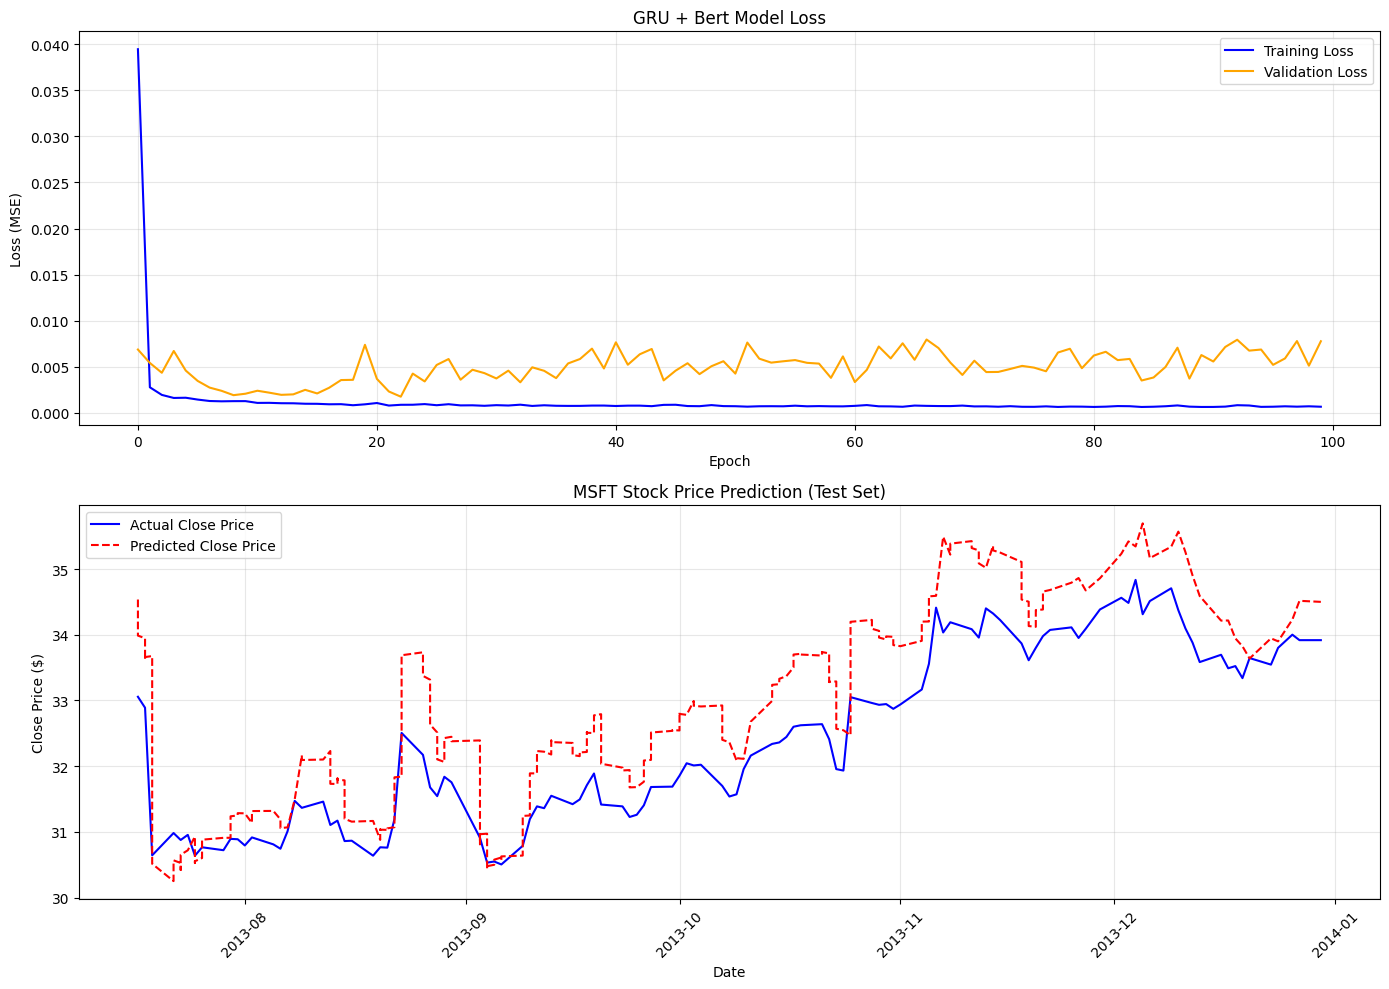

In [307]:
import matplotlib.pyplot as plt

# Assuming 'scaler' was used to normalize the 'Close' prices
close_min = train_data['Close'].min()
close_max = train_data['Close'].max()

# Denormalize the predictions and actual values to get the original scale
y_pred_denorm = y_pred * (close_max - close_min) + close_min
y_test_denorm = y_test * (close_max - close_min) + close_min
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot the loss curves
ax[0].plot(train_losses, label='Training Loss', color='blue')
ax[0].plot(val_losses, label='Validation Loss', color='orange')
ax[0].set_title('GRU + Bert Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Create a DataFrame with dates for plotting
test_dates = test_data.index[30:]  # Skip first 30 days used for sequence
bert_gru_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': y_pred_denorm
})

# Plot the actual vs predicted values
ax[1].plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(bert_gru_results_df['Date'], bert_gru_results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




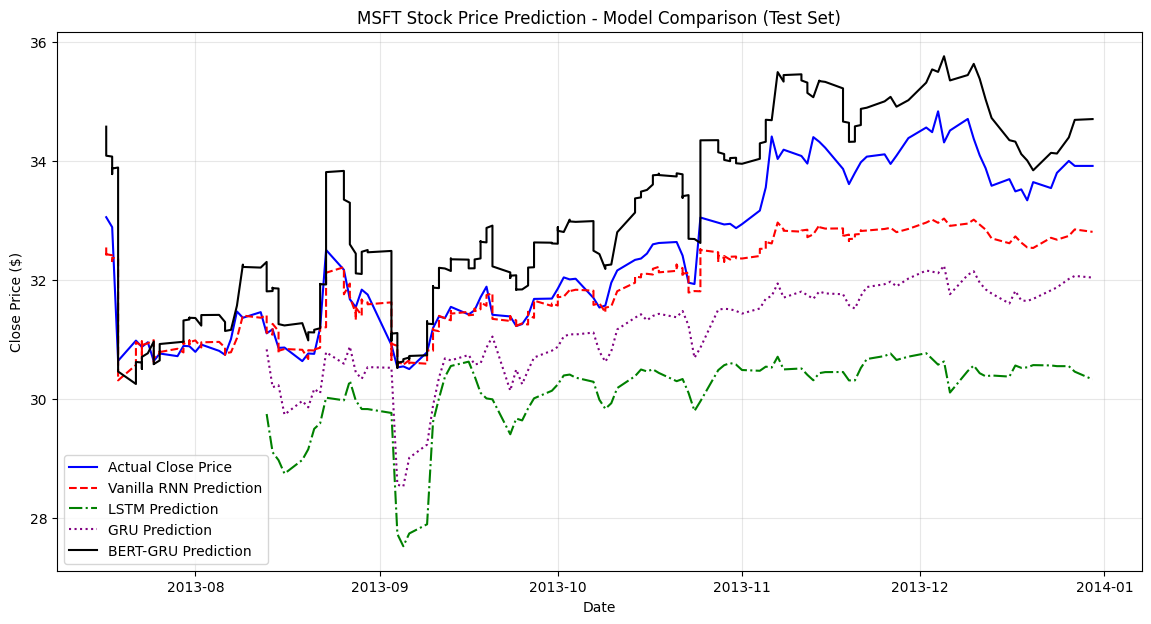

In [304]:
# plot the comparison
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Vanilla RNN Prediction', color='red', linestyle='--')
plt.plot(improved_lstm_results_df['Date'], improved_lstm_results_df['Predicted'], label='LSTM Prediction', color='green', linestyle='-.')
plt.plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='GRU Prediction', color='purple', linestyle=':')
plt.plot(bert_gru_results_df['Date'], bert_gru_results_df['Predicted'], label='BERT-GRU Prediction', color='black')
plt.title('MSFT Stock Price Prediction - Model Comparison (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()